<a href="https://colab.research.google.com/github/arkapriyathecoderinprogress/Codsoft_DS_Projects/blob/main/TitanicSurvivorPredictionLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
# Load Dataset
# Load the dataset from CSV files
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Combine train and test datasets for consistent preprocessing
combined_data = pd.concat([train_data, test_data], sort=False)

In [47]:
# Exploratory Data Analysis (EDA)
print(combined_data.head())
print(combined_data.info())
print(combined_data.describe())

# Check for missing values
print(combined_data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [48]:
# Feature Engineering
combined_data['Title'] = combined_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
combined_data['FamilySize'] = combined_data['SibSp'] + combined_data['Parch'] + 1
combined_data['IsAlone'] = combined_data['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

In [49]:
# Handle missing values
# Fill missing values
combined_data['Age'].fillna(combined_data['Age'].median(), inplace=True)
combined_data['Embarked'].fillna(combined_data['Embarked'].mode()[0], inplace=True)
combined_data['Fare'].fillna(combined_data['Fare'].median(), inplace=True)

# Drop columns that won't be used
combined_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [50]:
# Encoding categorical variables
combined_data['Sex'] = LabelEncoder().fit_transform(combined_data['Sex'])
combined_data['Embarked'] = LabelEncoder().fit_transform(combined_data['Embarked'])
combined_data['Title'] = LabelEncoder().fit_transform(combined_data['Title'])

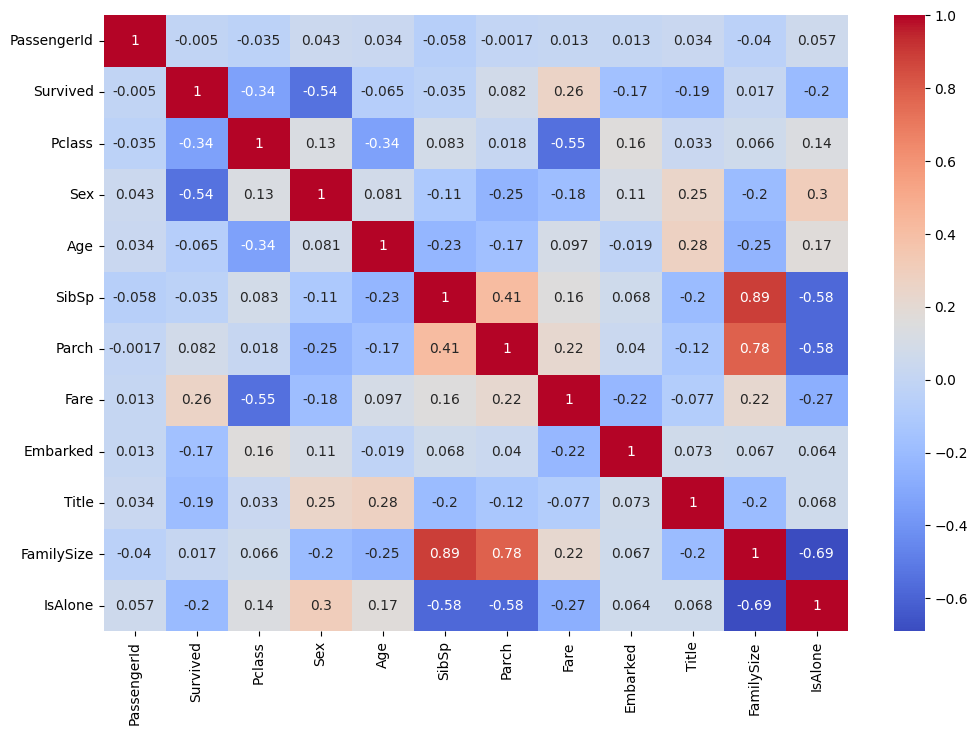

In [51]:
# Split back into train and test sets
train_data = combined_data[:len(train_data)]
test_data = combined_data[len(train_data):]

# Correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [52]:
# Define features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [54]:
# Train Logistic Regression model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Training Accuracy: 81.18%
Validation Accuracy: 80.45%
Confusion Matrix:
[[90 15]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       105
         1.0       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



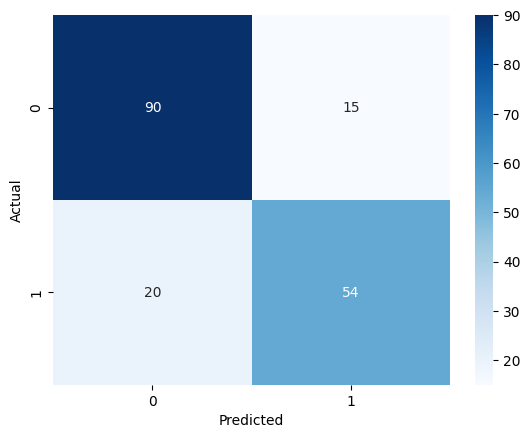

In [55]:
# Evaluate the model
# Predict on the training set
y_train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the validation set
y_val_pred = logreg.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
# Prepare test set predictions
test_features = test_data.drop('Survived', axis=1)
test_features_scaled = scaler.transform(test_features)

test_predictions = logreg.predict(test_features_scaled)

In [57]:
# Prepare submission CSV
submission_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

submission_df.to_csv('titanic_survival_predictions.csv', index=False)